In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
PassengerId_test = test_df['PassengerId']

### Исследование датасета 

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
df.describe(include = ['object'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [10]:
# Кол-во уникальных значений в каждой нечисловой колонке датасета

obj_cols = list(df.select_dtypes(['object']).columns)

for col in obj_cols:
    print(f'Кол-во уникальных значений в колонке {col}: {df[col].nunique()}')

Кол-во уникальных значений в колонке PassengerId: 8693
Кол-во уникальных значений в колонке HomePlanet: 3
Кол-во уникальных значений в колонке CryoSleep: 2
Кол-во уникальных значений в колонке Cabin: 6560
Кол-во уникальных значений в колонке Destination: 3
Кол-во уникальных значений в колонке VIP: 2
Кол-во уникальных значений в колонке Name: 8473


Колонки PassengerId, Cabin и Name являются именами уникальными. Для дальнейшего построения модели они не подойдут

In [11]:
# Удаление ненужных колонок 

del_cols = [col for col in df.columns if (col in obj_cols) and (df[col].nunique() > 10)]

df.drop(del_cols, axis = 1, inplace = True)
test_df.drop(del_cols, axis = 1, inplace = True)

In [12]:
# Поиск пропущенных значений

df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Заменим пустые числовые значения на медиану, а для категориальных значений создами новую переменную 'no information'

In [13]:
num_cols = list(df.select_dtypes(['float64']).columns)

df.fillna(df[num_cols].median(), inplace = True)
test_df.fillna(test_df[num_cols].median(), inplace = True)

In [14]:
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [15]:
test_df.isnull().sum()

HomePlanet      87
CryoSleep       93
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
dtype: int64

In [16]:
df.fillna(df.mode().iloc[0], inplace = True)
test_df.fillna(test_df.mode().iloc[0], inplace = True)

df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [17]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(2)
memory usage: 568.9+ KB


In [19]:
df['CryoSleep'].unique()

array([False,  True])

### Кодирование переменных 

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

obj_col = [col for col in df.columns if (col not in num_cols) and (df[col].dtypes == 'object')]

bool_col = list(df.select_dtypes(['bool']).columns)
bool_col_test = list(test_df.select_dtypes(['bool']).columns) 

for col in obj_col:
    df[col] = encoder.fit_transform(df[col])
    test_df[col] = encoder.fit_transform(test_df[col])

for col in bool_col:
    if (col in bool_col) and (col in bool_col_test):
        df[col] = encoder.fit_transform(df[col])
        test_df[col] = encoder.fit_transform(test_df[col])
    else:
        df[col] = encoder.fit_transform(df[col])

    
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [21]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


### Распределение данных 

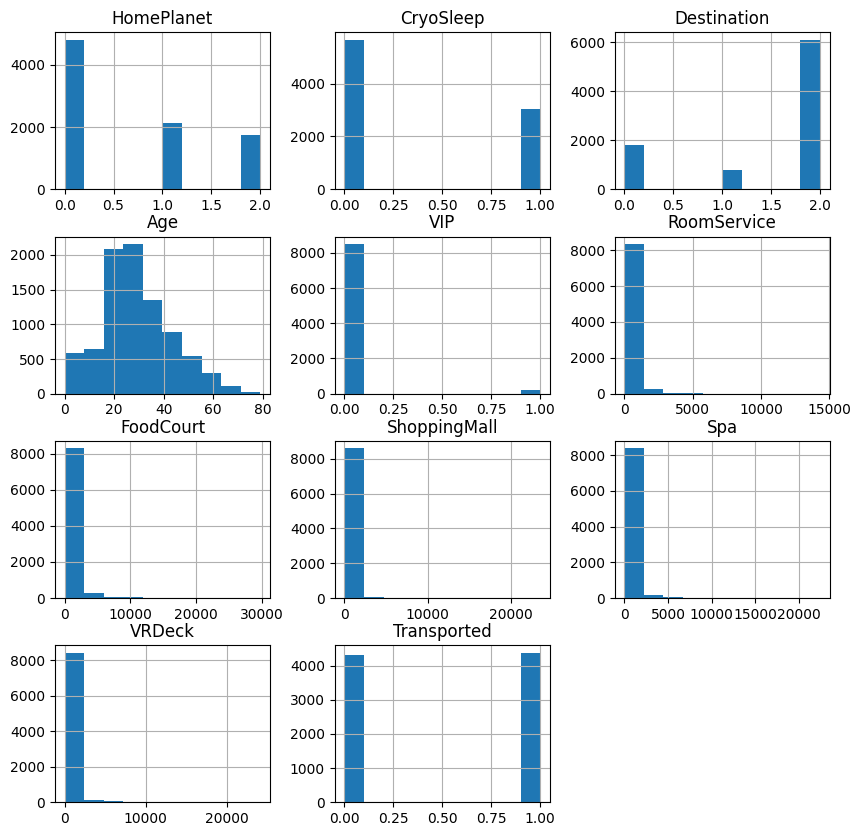

In [22]:
df.hist(figsize = (10, 10));

### Выбросы в переменных 

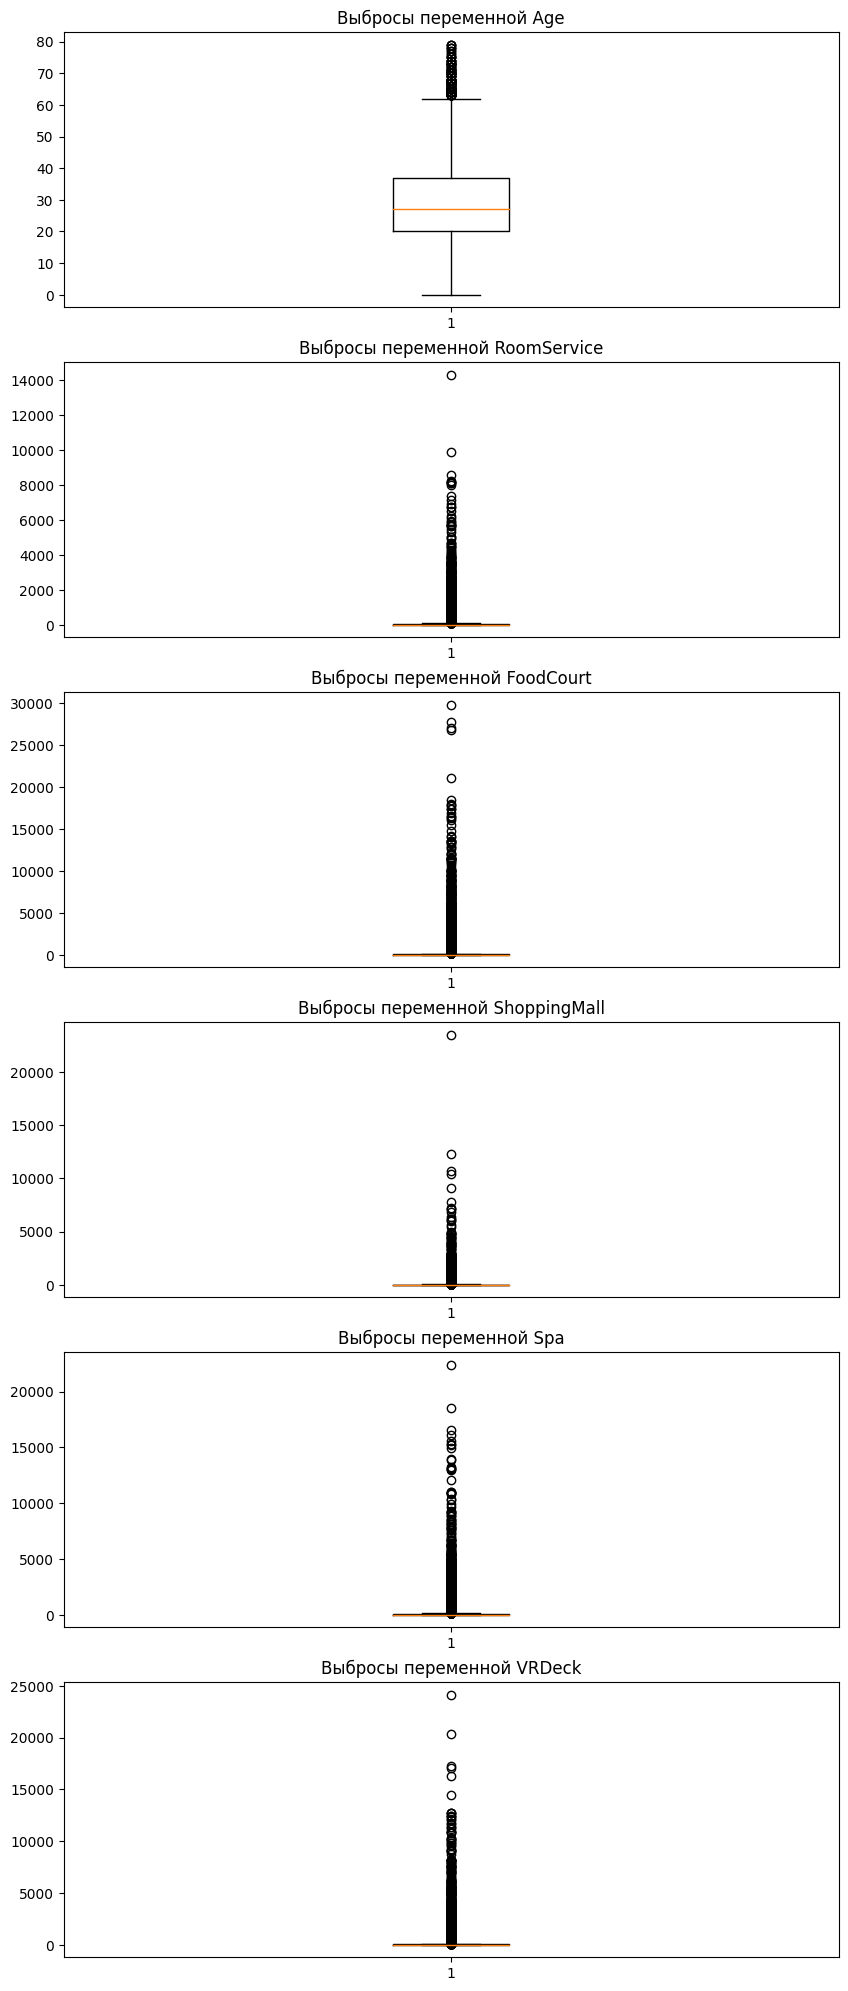

In [23]:
num_cols = [col for col in df.columns if df[col].nunique() > 4]

fig, axs = plt.subplots(ncols = 1, nrows = len(num_cols), figsize = (10, 25))




for i in range(len(num_cols)):
    axs[i].boxplot(df[num_cols[i]])
    axs[i].set_title(f'Выбросы переменной {num_cols[i]}')
        
plt.show()

### Корреляция переменных 

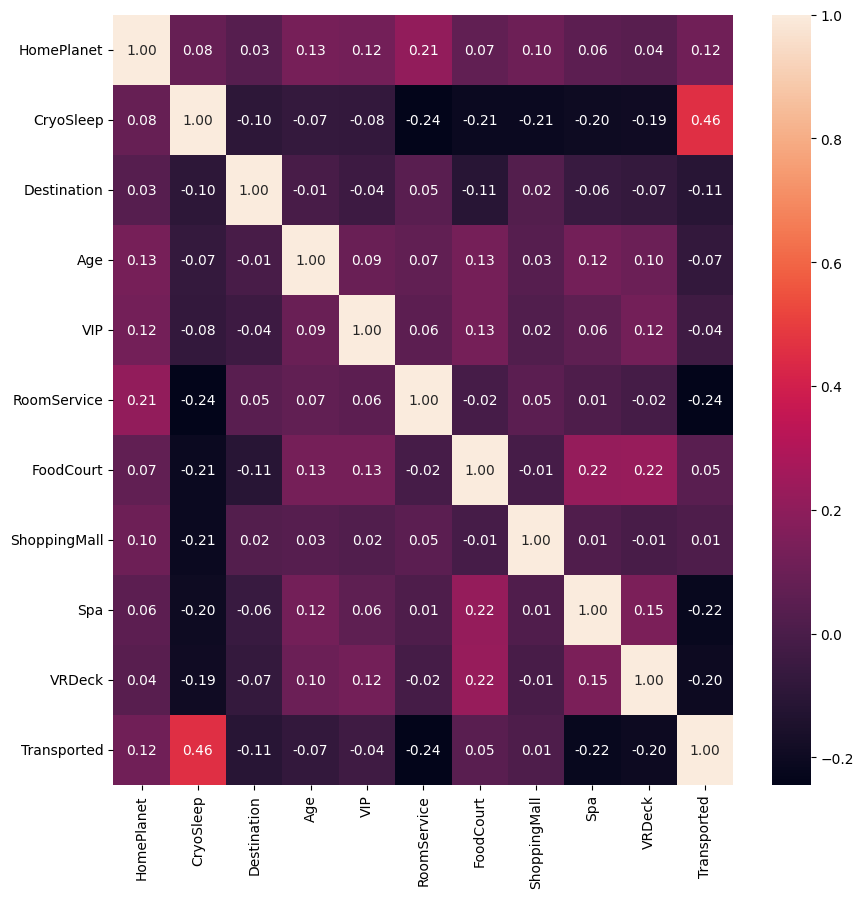

In [24]:
plt.figure(figsize = (10, 10))

sns.heatmap(df.corr(), annot = True, fmt = '.2f')

plt.show()

### Разделение данных для тренировки модели 

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    df.drop(['Transported'], axis = 1),
                                    df['Transported'],
                                    test_size = 0.3,
                                    stratify = df['Transported'])


### Шкалирование данных 

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col_to_scale = [col for col in df.columns if df[col].nunique() > 2]

X_train_scaled = scaler.fit_transform(X_train[col_to_scale])
X_test_scaled = scaler.transform(X_test[col_to_scale])

X_train[col_to_scale] = X_train_scaled
X_test[col_to_scale] = X_test_scaled

### Baseline 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lnr = LogisticRegression()
lnr.fit(X_train, y_train)

lnr_prediction = lnr.predict(X_test)
print('Качество базового алгоритма {:.3f}'.format(accuracy_score(lnr_prediction, y_test)))  

Качество базового алгоритма 0.757


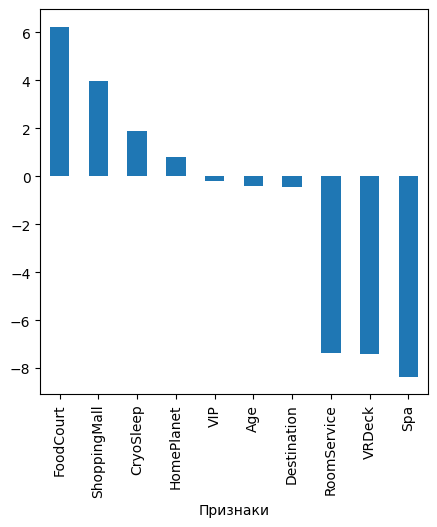

In [28]:
# Визуализация важности признаков

featureImportance = pd.DataFrame({
    'Признаки': df.drop(['Transported'], axis = 1).columns,
    'Важность': lnr.coef_[0]
})


featureImportance.set_index('Признаки', inplace = True)
featureImportance.sort_values(['Важность'], ascending = False, inplace = True)
featureImportance['Важность'].plot(kind = 'bar', figsize = (5, 5));

# Voting Classifiers (hard)

In [29]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier



In [30]:
# Настройка гиперпараметров для DecisionTreeClassifier

tree_param = {
    'max_depth': list(range(3, 11)),
    'min_samples_leaf': list(range(3, 11)),
    'class_weight': [None, 'balanced']
}


tree_model = RandomizedSearchCV(DecisionTreeClassifier(random_state = 17),
                         tree_param,
                         cv = 5,
                         scoring = 'accuracy',
                         n_jobs = -1)

tree_model.fit(X_train, y_train)

print('Лучшие гиперпараметры {} у модели {} выдают accuracy_score {:.3f}'.format(tree_model.best_params_,
                                                                                str(DecisionTreeClassifier()),
                                                                                tree_model.best_score_))

Лучшие гиперпараметры {'min_samples_leaf': 9, 'max_depth': 8, 'class_weight': None} у модели DecisionTreeClassifier() выдают accuracy_score 0.774


In [31]:
# Настройка гиперпараметров для SVC

svc_params = {
    'kernel': ['linear', 'poly'],
    'C': [10, 100, 1000]
}

svc_model = RandomizedSearchCV(SVC(random_state = 17),
                        svc_params,
                        cv = 5,
                        scoring = 'accuracy',
                        n_jobs = -1)

svc_model.fit(X_train, y_train)

print('Лучшие гиперпараметры {} у модели {} выдают accuracy_score {:.3f}'.format(svc_model.best_params_,
                                                                                str(SVC()),
                                                                                svc_model.best_score_))

Лучшие гиперпараметры {'kernel': 'poly', 'C': 1000} у модели SVC() выдают accuracy_score 0.772


In [32]:
# Настройка гиперпараметров для LogisticRegression

log_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 10, 100],
    'max_iter': [100, 200, 500, 1000]
}

log_model = RandomizedSearchCV(LogisticRegression(random_state = 17),
                              log_params,
                              cv = 5, 
                              scoring = 'accuracy',
                              n_jobs = -1)

log_model.fit(X_train, y_train)

print('Лучшие гиперпараметры {} у модели {} выдают accuracy_score {:.3f}'.format(log_model.best_params_,
                                                                                str(LogisticRegression()),
                                                                                log_model.best_score_))

Лучшие гиперпараметры {'penalty': 'none', 'max_iter': 1000, 'C': 0.1} у модели LogisticRegression() выдают accuracy_score 0.782


In [33]:
# hard voting

voting_clf = VotingClassifier(
            estimators = [('tree', tree_model.best_estimator_), ('svc', svc_model.best_estimator_), ('lr', log_model.best_estimator_)],
            voting = 'hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=8,
                                                     min_samples_leaf=9,
                                                     random_state=17)),
                             ('svc',
                              SVC(C=1000, kernel='poly', random_state=17)),
                             ('lr',
                              LogisticRegression(C=0.1, max_iter=1000,
                                                 penalty='none',
                                                 random_state=17))])

In [34]:
# Качество hard voting classifier

voting_clf_prediction = voting_clf.predict(X_test)

print('Качество правильных ответов алгоритма {} равно {:.3f}'.format('VotingClassifier', accuracy_score(voting_clf_prediction, y_test)))

Качество правильных ответов алгоритма VotingClassifier равно 0.787


# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

forest_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 5, 10]
}

forest_clf = RandomizedSearchCV(RandomForestClassifier(random_state = 17),
                               forest_params,
                               cv = 5,
                               scoring = 'accuracy')

forest_clf.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100]},
                   scoring='accuracy')

In [36]:
# Качество модели

forest_clf_prediction = forest_clf.best_estimator_.predict(X_test)

print('Доля правильных ответов модели {} равна {:.3f}'.format('RandomForestClassifier', accuracy_score(forest_clf_prediction, y_test)))

Доля правильных ответов модели RandomForestClassifier равна 0.791


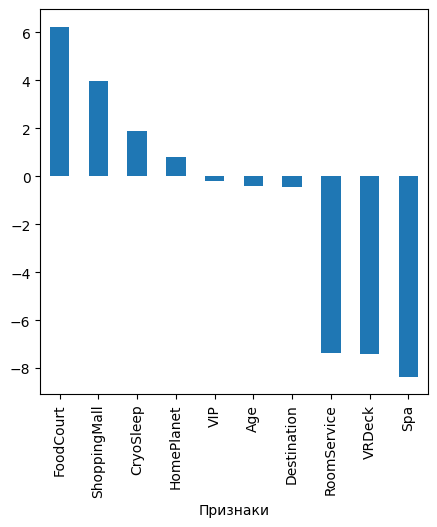

In [37]:
# Визуализация важности признаков RandomForestClassifier

feauterImportance = pd.DataFrame({'Признаки': X_train.columns,
                                'Важность': forest_clf.best_estimator_.feature_importances_})

feauterImportance.set_index('Признаки', inplace = True)
featureImportance.sort_values('Важность', ascending = False, inplace = True)
featureImportance['Важность'].plot(kind = 'bar', figsize = (5, 5));

# LightGBM


In [38]:
import lightgbm as lgb

lgbm_params = {
    'max_depth': [2, 3, 4, 6, 8, 10],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.025, 0.05, 0.075]
}

boost_model = lgb.LGBMClassifier(random_state = 17)

model = RandomizedSearchCV(boost_model,
                          lgbm_params,
                          cv = 5,
                          scoring = 'accuracy')

model.fit(X_train, y_train)



print('Наилучшие показатели алгоритма {:.3f}\nЛучшая модель {}'.format(model.best_score_, model.best_estimator_))


Наилучшие показатели алгоритма 0.789
Лучшая модель LGBMClassifier(learning_rate=0.05, max_depth=8, random_state=17)


In [39]:
# Показатели качества алгоритма lightgbm

model_prediction = model.best_estimator_.predict(X_test) 

print('Доля правильных ответов у алгоритма {} равна {:.3f}'.format('lightgbm', accuracy_score(model_prediction, y_test)))

Доля правильных ответов у алгоритма lightgbm равна 0.801


У алгоритма lightgbm наиболее высокая доля правильных ответов. Accuracy_score равен 0.801

# Предсказания для test.csv 

In [42]:
test_prediction = model.best_estimator_.predict(test_df.values)

print(test_prediction)

[1 0 1 ... 1 0 1]


In [46]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [44]:
PassengerId_test

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [48]:
# Создание датафрейма с предсказаниями

predicted_df = pd.DataFrame(np.array([PassengerId_test, test_prediction]).T, columns = ['PassengerId', 'Transported'])
predicted_df.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0


In [49]:
# Замена 0 и 1 на булевые значения

predicted_df = predicted_df.replace({0: False, 1: True})
predicted_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [50]:
predicted_df.to_csv('sample_submission.csv', index = False)